# Loading And Graphing Monthly Summaries

In [1]:
# Make the json_helper module available to this notebook.
import sys


In [2]:
sys.path.append('../NOAADailySummaries')

In [3]:
# Using the json_helper module, load all of the json files acquired in part one of this lab into a Pandas DataFrame.
from j_help import *

df = json_helper('data/monthly_summaries')

data/monthly_summaries/FIPS10003_avg_1988_to_1998.json
data/monthly_summaries/FIPS10003_avg_1938_to_1948.json
data/monthly_summaries/FIPS10003_avg_2008_to_2018.json
data/monthly_summaries/FIPS10003_avg_1948_to_1958.json
data/monthly_summaries/FIPS10003_avg_1968_to_1978.json
data/monthly_summaries/FIPS10003_avg_1998_to_2008.json
data/monthly_summaries/FIPS10003_avg_1978_to_1988.json
data/monthly_summaries/FIPS10003_avg_2018_to_2028.json
data/monthly_summaries/FIPS10003_avg_1958_to_1968.json


/Users/chris/pyprojects/NotebooksWeek7/NOAAMonthlySummaries/../NOAADailySummaries/j_help.py:26: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_json(new_json_contents)
/Users/chris/pyprojects/NotebooksWeek7/NOAAMonthlySummaries/../NOAADailySummaries/j_help.py:26: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_json(new_json_contents)
/Users/chris/pyprojects/NotebooksWeek7/NOAAMonthlySummaries/../NOAADailySummaries/j_help.py:26: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_df = pd.read_json(new_json_contents)
/Users/chris/pyprojects/NotebooksWeek7/NOAAMonthlySummaries/../NOAADailySumm

In [4]:
# Display a summary of the DataFrame
df.describe()

,date,value
count,3464,3464.000000
mean,1978-08-19 00:15:22.863741312,12.410797
min,1938-01-01 00:00:00,-6.590000
25%,1958-07-24 06:00:00,4.400000
50%,1977-03-16 12:00:00,12.430000
75%,1997-10-01 00:00:00,20.945000
max,2024-03-01 00:00:00,27.340000
std,NaN,8.813918


In [5]:
df

,date,datatype,station,attributes,value,source
0,1988-01-01,TAVG,GHCND:USC00075852,"2,0",-1.98,FIPS10003_avg_1988_to_1998.json
1,1988-01-01,TAVG,GHCND:USC00076410,",0",-2.39,FIPS10003_avg_1988_to_1998.json
2,1988-01-01,TAVG,GHCND:USC00079605,",0",-2.27,FIPS10003_avg_1988_to_1998.json
3,1988-01-01,TAVG,GHCND:USW00013781,",0",-2.57,FIPS10003_avg_1988_to_1998.json
4,1988-02-01,TAVG,GHCND:USC00075852,",0",2.04,FIPS10003_avg_1988_to_1998.json
...,...,...,...,...,...,...
3459,1967-12-01,TAVG,GHCND:USW00013781,",0",2.65,FIPS10003_avg_1958_to_1968.json
3460,1968-01-01,TAVG,GHCND:USC00075852,",0",-1.52,FIPS10003_avg_1958_to_1968.json
3461,1968-01-01,TAVG,GHCND:USC00076410,",0",-1.77,FIPS10003_avg_1958_to_1968.json
3462,1968-01-01,TAVG,GHCND:USC00079605,",0",-2.45,FIPS10003_avg_1958_to_1968.json


In [6]:
# How many stations are there?
# How many rows are associated with each DataFrame?
station1 = df[df['station']== 'GHCND:USC00075852'].shape[0]
station2 = df[df['station']!= 'GHCND:USC00075852'].shape[0]
stations = station1 + station2
print(f'total rows: {df.shape[0]}\ntotal rows w/o stations 1 and 2: {df.shape[0] - stations}\nthere are two stations')


total rows: 3464
total rows w/o stations 1 and 2: 0
there are two stations


# Narrow our analysis to station id: GHCND:USW00013781

https://www.ncdc.noaa.gov/cdo-web/api/v2/stations/GHCND:USC00071200

```json
{
    "elevation": 24.1,
    "mindate": "1948-01-01",
    "maxdate": "2019-12-05",
    "latitude": 39.6744,
    "name": "WILMINGTON NEW CASTLE CO AIRPORT, DE US",
    "datacoverage": 1,
    "id": "GHCND:USW00013781",
    "elevationUnit": "METERS",
    "longitude": -75.60567
}
```

In [7]:
# Create a DataFrame called "df_wilm_readings". 
# This DataFrame should only contain records associated with station id 'GHCND:USW00013781'.
# df_wilm_readings = df[df['station']=='GHCND:USC00071200']
df_wilm_readings = df[df['station'] == "GHCND:USW00013781"].sort_values(by=['date']).reset_index(drop=True)

df_wilm_readings

,date,datatype,station,attributes,value,source
0,1942-05-01,TAVG,GHCND:USW00013781,",Z",19.25,FIPS10003_avg_1938_to_1948.json
1,1942-06-01,TAVG,GHCND:USW00013781,",Z",22.40,FIPS10003_avg_1938_to_1948.json
2,1942-07-01,TAVG,GHCND:USW00013781,",Z",24.67,FIPS10003_avg_1938_to_1948.json
3,1942-08-01,TAVG,GHCND:USW00013781,"1,Z",22.70,FIPS10003_avg_1938_to_1948.json
4,1942-09-01,TAVG,GHCND:USW00013781,",Z",20.09,FIPS10003_avg_1938_to_1948.json
...,...,...,...,...,...,...
926,2023-11-01,TAVG,GHCND:USW00013781,",W",6.77,FIPS10003_avg_2018_to_2028.json
927,2023-12-01,TAVG,GHCND:USW00013781,",W",5.47,FIPS10003_avg_2018_to_2028.json
928,2024-01-01,TAVG,GHCND:USW00013781,",W",1.82,FIPS10003_avg_2018_to_2028.json
929,2024-02-01,TAVG,GHCND:USW00013781,",W",3.86,FIPS10003_avg_2018_to_2028.json


In [8]:
# Display a summary of the df_wilm_readings DataFrame.
df_wilm_readings.describe()

,date,value
count,931,931.000000
mean,1985-09-08 12:08:30.418904384,12.515693
min,1942-05-01 00:00:00,-6.200000
25%,1966-07-16 12:00:00,4.530000
50%,1985-10-01 00:00:00,12.540000
75%,2004-12-16 12:00:00,21.265000
max,2024-03-01 00:00:00,27.340000
std,NaN,8.860583


In [9]:
# Create a DataFrame called jan_readings.
# This DataFrame should filter the contents of df_wilm_readings in such a way that it only keeps records 
# which are associated with the month of January.
# Make sure that rows are sorted by date.
jan_readings = df_wilm_readings[df_wilm_readings.date.dt.month == 1].sort_values(by=['date']).reset_index(drop=True)
jan_readings

,date,datatype,station,attributes,value,source
0,1948-01-01,TAVG,GHCND:USW00013781,",X",-3.67,FIPS10003_avg_1938_to_1948.json
1,1948-01-01,TAVG,GHCND:USW00013781,",X",-3.67,FIPS10003_avg_1948_to_1958.json
2,1949-01-01,TAVG,GHCND:USW00013781,",0",3.98,FIPS10003_avg_1948_to_1958.json
3,1950-01-01,TAVG,GHCND:USW00013781,",0",5.94,FIPS10003_avg_1948_to_1958.json
4,1951-01-01,TAVG,GHCND:USW00013781,",0",1.21,FIPS10003_avg_1948_to_1958.json
...,...,...,...,...,...,...
80,2020-01-01,TAVG,GHCND:USW00013781,",W",3.90,FIPS10003_avg_2018_to_2028.json
81,2021-01-01,TAVG,GHCND:USW00013781,",W",1.84,FIPS10003_avg_2018_to_2028.json
82,2022-01-01,TAVG,GHCND:USW00013781,",W",-0.53,FIPS10003_avg_2018_to_2028.json
83,2023-01-01,TAVG,GHCND:USW00013781,",W",5.97,FIPS10003_avg_2018_to_2028.json


In [10]:
# What is the shape of jan_readings?
jan_readings.shape[0]

85

* Create a line graph which meets the following requirements:
* The x axis should represent the year.
* The y axis should represent the temperature in celsius.
* Each point should display the average temperature in celsius for a given year.
* At a minimum it should display data from 1938 to 2017. 
* Make sure to include the x and y labels. 
* Make sure that x and y ticks are readable. 

In [11]:
df = df.sort_values(by=['date']).reset_index(drop=True)

In [16]:
jan_readings2 = jan_readings.groupby(jan_readings.date.dt.year).size


TypeError: unhashable type: 'DataFrame'

Text(0.5, 0, 'Year')

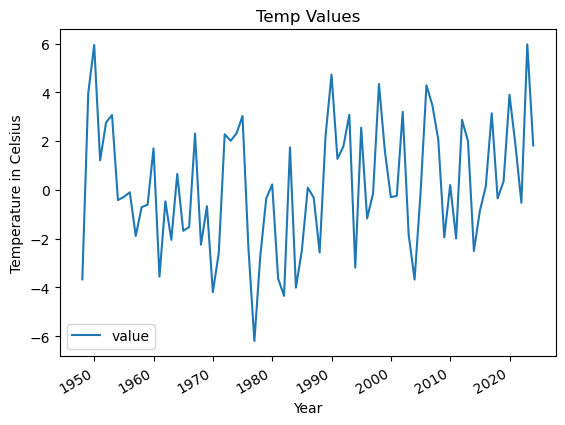

In [12]:
ax = jan_readings.plot.line(x='date',y ='value', title ='Temp Values' )
ax.set_ylabel('Temperature in Celsius')
ax.set_xlabel('Year')